In [81]:
!pip install opendatasets --quiet
import pandas as pd
import opendatasets as od

# Укажите URL набора данных Kaggle
dataset_url = "https://www.kaggle.com/competitions/classification-of-oil-and-gas-fields/data"

# Загрузите данные
od.download(dataset_url)

# Прочитайте файл
df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")
df.head()

Skipping, found downloaded files in "./classification-of-oil-and-gas-fields" (use force=True to force download)


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Field name                      309 non-null    object 
 1   Reservoir unit                  309 non-null    object 
 2   Country                         282 non-null    object 
 3   Region                          271 non-null    object 
 4   Basin name                      271 non-null    object 
 5   Tectonic regime                 309 non-null    object 
 6   Latitude                        282 non-null    float64
 7   Longitude                       279 non-null    float64
 8   Operator company                309 non-null    object 
 9   Onshore/Offshore                309 non-null    object 
 10  Hydrocarbon type                309 non-null    object 
 11  Reservoir status                309 non-null    object 
 12  Structural setting              309 

Очевидно, что Field name	 не должно влиять, т.к. это просто название.</br>Итересно посомтреть, какие уникальные значения у Revervoir unit- это, видимо сорт нефти. И Hydrocarbon type. Посчитаем их частоту

In [83]:
print("Уникальные значения и их частота в столбце 'Field name':")
print(df['Field name'].value_counts())

print("Уникальные значения и их частота в столбце 'Reservoir unit':")
print(df['Reservoir unit'].value_counts())

print("\nУникальные значения и их частота в столбце 'Hydrocarbon type':")
print(df['Hydrocarbon type'].value_counts())

Уникальные значения и их частота в столбце 'Field name':
Field name
ERSKINE              3
ZAKUM                3
LAOJUNMIAO           3
LLOYDMINSTER AREA    2
ELK BASIN            2
                    ..
WENMINGZHAI          1
BADR EL DIN-3        1
ANASAZI              1
BINDLEY              1
WELL DRAW            1
Name: count, Length: 285, dtype: int64
Уникальные значения и их частота в столбце 'Reservoir unit':
Reservoir unit
BRENT                        8
SAN ANDRES                   7
SHUAIBA                      5
TOR-EKOFISK                  4
LEMAN SANDSTONE              4
                            ..
WATT MOUNTAIN (GILWOOD A)    1
LOWER GANCHAIGOU             1
ZELTEN                       1
BATURAJA                     1
MESAVERDE (TEAPOT SAND)      1
Name: count, Length: 258, dtype: int64

Уникальные значения и их частота в столбце 'Hydrocarbon type':
Hydrocarbon type
OIL               231
GAS                46
GAS-CONDENSATE     30
CARBON DIOXIDE      2
Name: count, dt

Воспользуемся интуицией и предположим, что в Европе добыча нефти в основном идет на шельфе.

In [84]:
# Фильтруем DataFrame по условию
europe_data = df[df['Region'] == 'EUROPE']

# Считаем количество значений в столбце 'Onshore/Offshore'
onshore_offshore_counts = europe_data['Onshore/Offshore'].value_counts()

# Вычисляем процентное соотношение
onshore_offshore_percentages = onshore_offshore_counts / len(europe_data) * 100

# Выводим результат
print("Процентное соотношение значений в столбце 'Onshore/Offshore' для региона 'EUROPE':")
print(onshore_offshore_percentages)

Процентное соотношение значений в столбце 'Onshore/Offshore' для региона 'EUROPE':
Onshore/Offshore
OFFSHORE            84.615385
ONSHORE             10.256410
ONSHORE-OFFSHORE     5.128205
Name: count, dtype: float64


Так и есть. Очень похоже на то, что нужно использовать модель "Решающее дерево".
На самом деле очень интересно построить модель, которая бы долготе и широте определяла шельфовая это нефть.


In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

# Загрузка данных (предположим, что df уже загружен)
# Удаляем строки с пропущенными значениями в Latitude и Longitude
df_clean = df.dropna(subset=['Latitude', 'Longitude'])

# Признаки (Latitude и Longitude)
X = df_clean[['Latitude', 'Longitude']]

# Целевая переменная (например, 'Onshore/Offshore')
y = df_clean['Onshore/Offshore']  # Замените на вашу целевую переменную

# Преобразуем целевую переменную с помощью LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Проверка распределения классов
print("Распределение классов после разделения:")
print(pd.Series(y_train).value_counts())

# Небольшой оверсэмплинг с помощью RandomOverSampler
ros = RandomOverSampler(random_state=42, sampling_strategy={2: 10})  # Увеличиваем класс 2 до 10 образцов
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Проверка распределения классов после RandomOverSampler
print("\nРаспределение классов после RandomOverSampler:")
print(pd.Series(y_train_ros).value_counts())

# Дополнение данных с помощью SMOTE с уменьшенным n_neighbors
try:
    smote = SMOTE(random_state=42, k_neighbors=4)  # Уменьшаем n_neighbors до 4
    X_train_smote, y_train_smote = smote.fit_resample(X_train_ros, y_train_ros)
    print("\nДанные успешно дополнены с помощью SMOTE.")
except ValueError as e:
    print(f"\nОшибка при использовании SMOTE: {e}")
    print("Используем ADASYN с уменьшенным n_neighbors.")
    adasyn = ADASYN(random_state=42, n_neighbors=4)  # Уменьшаем n_neighbors до 4
    X_train_smote, y_train_smote = adasyn.fit_resample(X_train_ros, y_train_ros)

# Обучение модели KNN на данных, дополненных SMOTE или ADASYN
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote, y_train_smote)

# Предсказание на тестовых данных
y_pred_smote = knn_smote.predict(X_test)

# Преобразуем числовые метки обратно в строковые для classification_report
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_smote_labels = label_encoder.inverse_transform(y_pred_smote)

# Оценка модели
print("\nРезультаты для SMOTE/ADASYN:")
print("Accuracy:", accuracy_score(y_test_labels, y_pred_smote_labels))
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_smote_labels))

# Сохранение дополненных данных в CSV
df_smote = pd.DataFrame(X_train_smote, columns=['Latitude', 'Longitude'])
df_smote['Onshore/Offshore'] = label_encoder.inverse_transform(y_train_smote)
df_smote['Method'] = 'SMOTE/ADASYN'

df_smote.to_csv('augmented_data.csv', index=False)
print("\nДополненные данные сохранены в файл 'augmented_data.csv'.")

Распределение классов после разделения:
1    133
0     60
2      2
Name: count, dtype: int64

Распределение классов после RandomOverSampler:
1    133
0     60
2     10
Name: count, dtype: int64

Данные успешно дополнены с помощью SMOTE.

Результаты для SMOTE/ADASYN:
Accuracy: 0.8571428571428571

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       0.81      0.85      0.83        20
         ONSHORE       0.93      0.87      0.90        62
ONSHORE-OFFSHORE       0.20      0.50      0.29         2

        accuracy                           0.86        84
       macro avg       0.65      0.74      0.67        84
    weighted avg       0.88      0.86      0.87        84


Дополненные данные сохранены в файл 'augmented_data.csv'.


Что ж, у нас уже есть 85% только по долготе и широте. Вообще, очевидно, что самый лучший способ предсказать - это посмотреть на карте.
Не могу отказать себе в удовольстви попросить ml.net подобрать нам лучший алгорим.

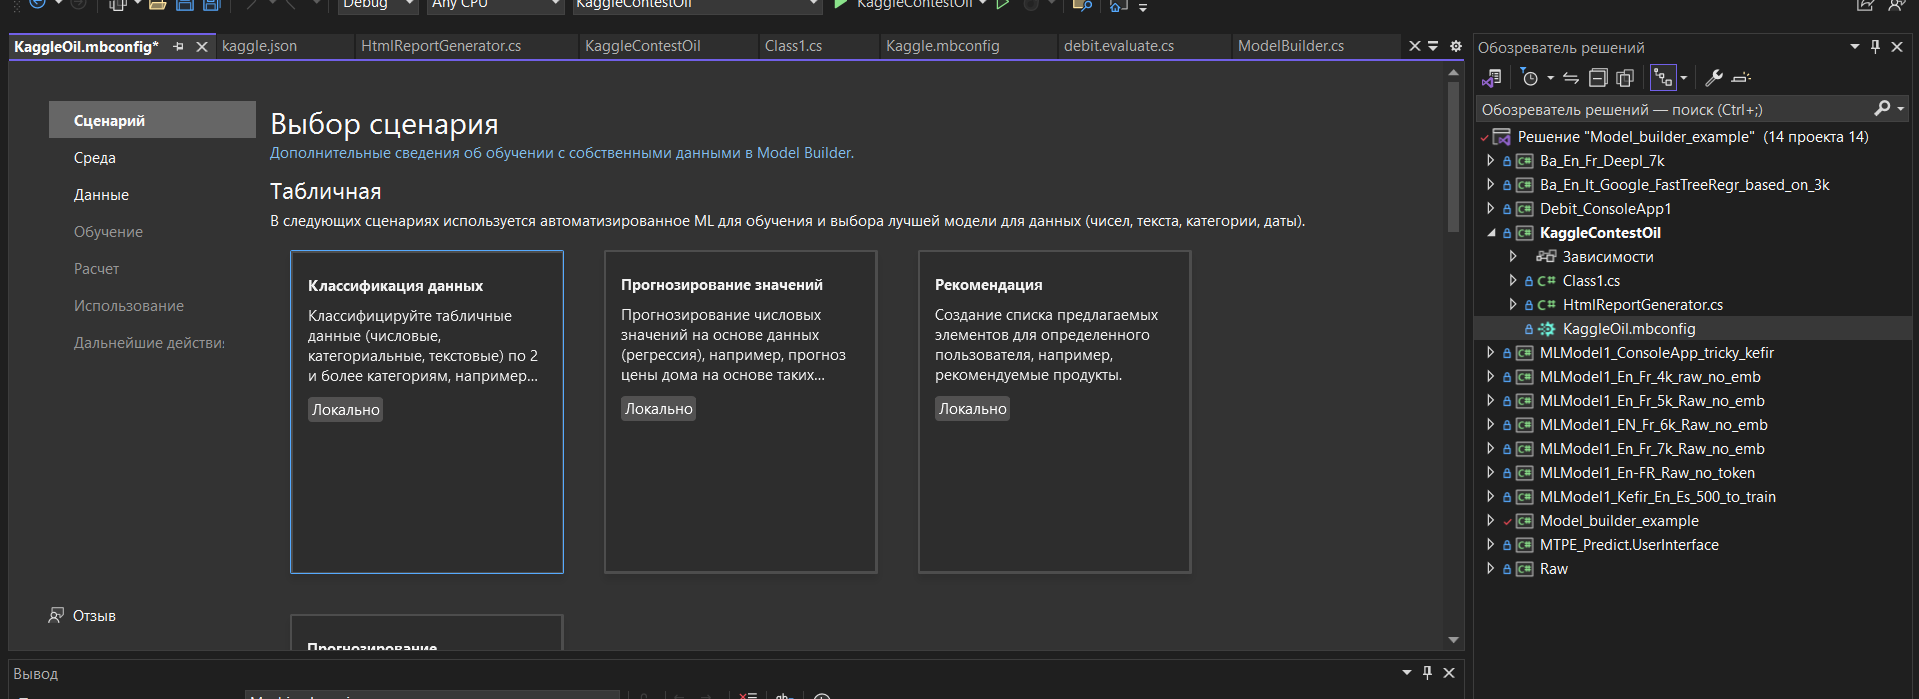

Используем аугментированные данные для обучения
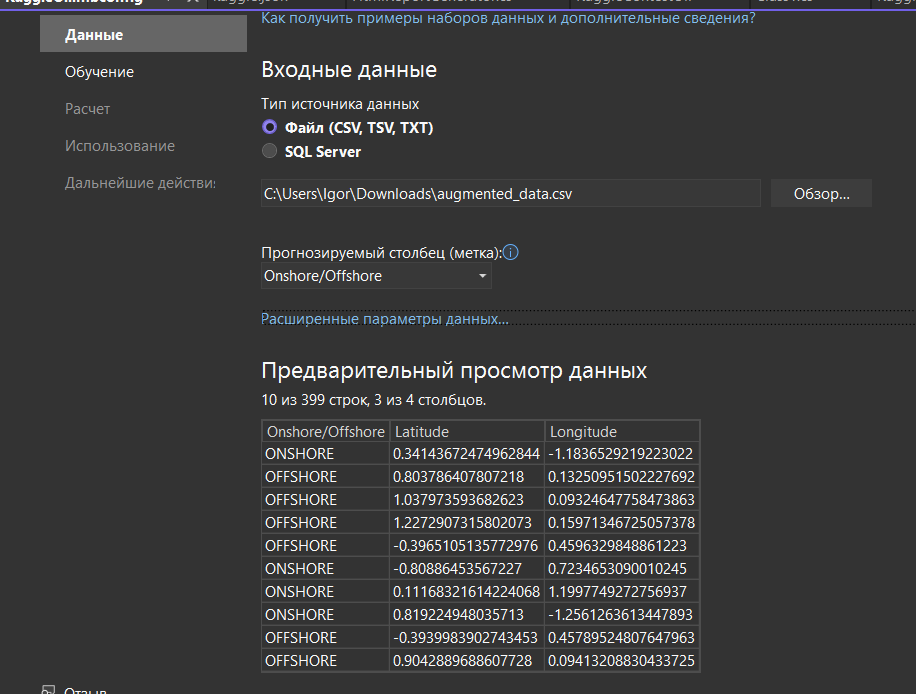

Поставил обучение на 100 секунд. ML.NET подобрал модель FastTreeOva c точностью 0.9381. Займемся ее деплоем и проверим, как она справится с тестовым датасетов.

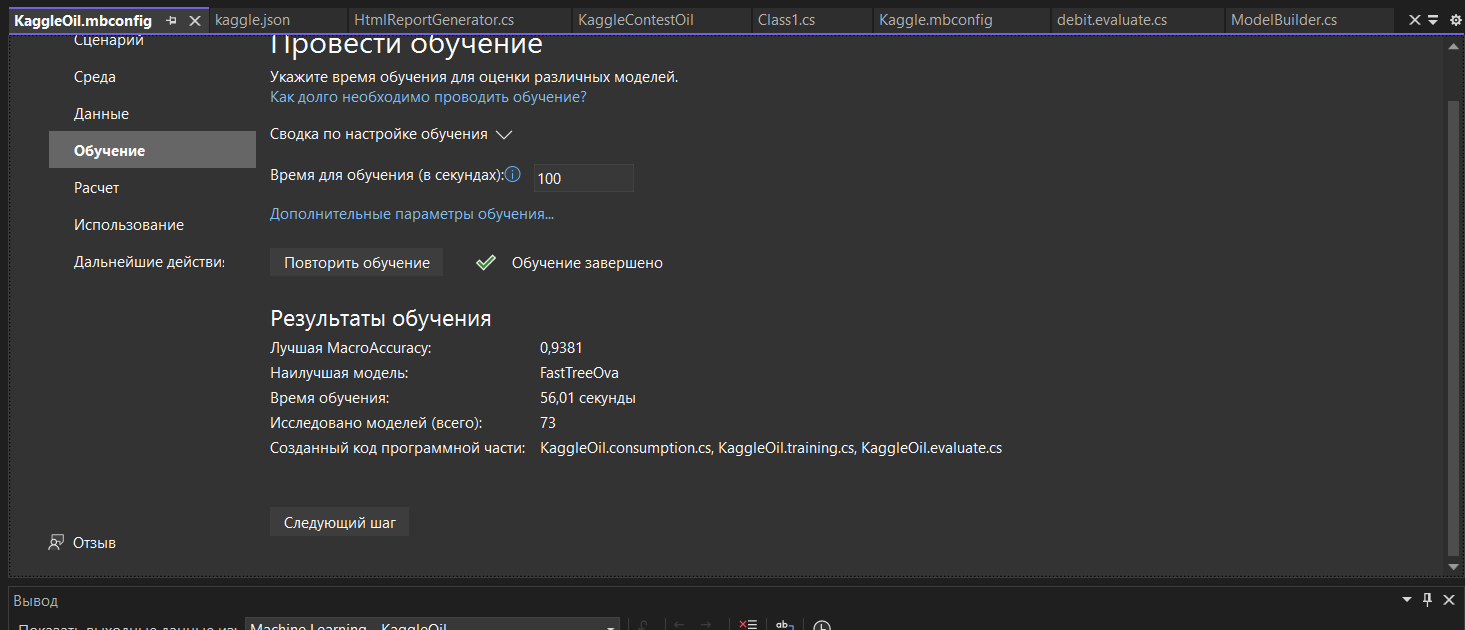

Подсмотрим, какие гиперпараметры к такому результату привели

In [86]:
NumberOfLeaves = 13
MinimumExampleCountPerLeaf = 10
NumberOfTrees = 8
MaximumBinCountPerFeature = 217
FeatureFraction = 0.8133030942444808
LearningRate = 0.328640224988134
DiskTranspose = False

Я попытался использовать модель машинного обучения в дотнете.
Однако столкнулся с очень странной проблемой: в тестовом датасете пропуски.
Предполагаю, что так быть не должно и  методист не очень качественно разделил учебный и тестовый датасеты. Отчет приложу к дз.
Поэтому ничего не остается, как вернуться к классике и возможно обработать тестовый датасет (как бы это странно ни звучало)?

В принципе гиперпараметры модели у нас есть, попробуем что-то соорудить в питоне.

In [87]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")

# Признаки и целевая переменная
X_lgmb = df[['Latitude', 'Longitude']]
y_lgbm = df['Onshore/Offshore']

# Преобразование целевой переменной в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_lgbm)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_lgmb, y_encoded, test_size=0.3, random_state=42)

# Создание датасетов для LightGBM
train_data = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, free_raw_data=False)

# Параметры модели
params = {
    'objective': 'multiclass',  # Многоклассовая классификация
    'num_class': len(label_encoder.classes_),  # Количество классов
    'num_leaves': 13,  # Количество листьев
    'min_data_in_leaf': 10,  # Минимальное количество примеров в листе
    'num_boost_round': 8,  # Количество деревьев
    'max_bin': 217,  # Максимальное количество бинов для каждой фичи
    'feature_fraction': 0.8133,  # Доля фич, используемых для построения каждого дерева
    'learning_rate': 0.3286,  # Скорость обучения
    'verbose': -1  # Отключение вывода логов
}

# Обучение модели
model = lgb.train(
    params,
    train_data,
    num_boost_round=8,  # Количество деревьев
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]  # Ранняя остановка
)

# Предсказание на тестовых данных
y_pred = model.predict(X_test, num_iteration=model.best_iteration)  # Используем X_test
y_pred_labels = y_pred.argmax(axis=1)  # Преобразование вероятностей в метки классов

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[8]	valid_0's multi_logloss: 0.261011
Accuracy: 0.9032258064516129

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       0.83      0.83      0.83        24
         ONSHORE       0.93      0.94      0.93        68
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.90        93
       macro avg       0.59      0.59      0.59        93
    weighted avg       0.89      0.90      0.90        93



/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 

Посмотрим оценки в кагл

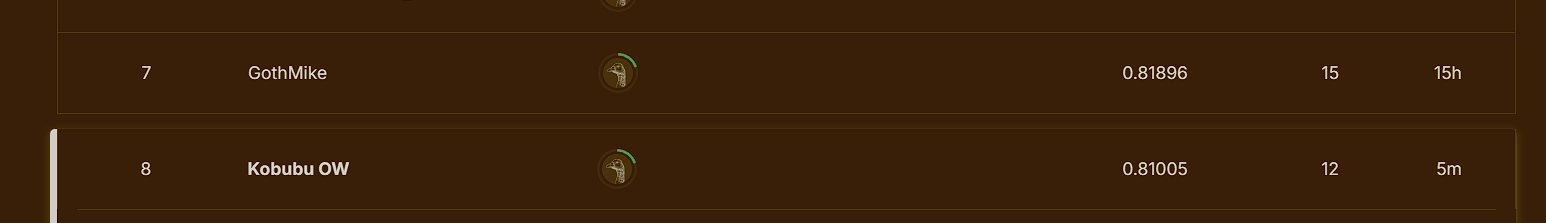

А вообще давайте исправим датасет, добавим туда недостающие значения по широте и долготе и попробуем сделать предикт.

In [88]:
# Загрузка тестовых данных
df_test = pd.read_csv("/content/oil_test_fixed.csv")

# Признаки
X_test = df_test[['Latitude', 'Longitude']]

# Предсказание
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_test_labels = y_pred_test.argmax(axis=1)  # Преобразование вероятностей в метки классов

# Преобразование числовых меток обратно в строковые
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_labels)

# Создание DataFrame с результатами
results = pd.DataFrame({
    'index': range(len(y_pred_test_labels)),  # Индексы строк
    'Onshore/Offshore': y_pred_test_labels  # Предсказанные метки
})


# Преобразование строковых меток в числовые
results['Onshore/Offshore'] = results['Onshore/Offshore'].apply(lambda x: 1 if x == 'ONSHORE' else 0)

In [89]:
import locale
from datetime import datetime

# Сохранение текущей локали
current_locale = locale.getlocale()

# Установка английской локали
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

now = datetime.now()

name = f"oil_test_predictions_{now}.csv"

# Сохранение результатов в CSV
results.to_csv(name, index=False)

# Восстановление исходной локали
locale.setlocale(locale.LC_ALL, current_locale)

print(f"Предсказания сохранены в файл {name}.")

Предсказания сохранены в файл oil_test_predictions_2025-03-10 19:37:00.053966.csv.


In [90]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")

# Признаки и целевая переменная
X_lgmb = df[['Latitude', 'Longitude']]
y_lgbm = df['Onshore/Offshore']

# Преобразование целевой переменной в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_lgbm)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_lgmb, y_encoded, test_size=0.3, random_state=42)

# Создание датасетов для LightGBM
train_data = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, free_raw_data=False)

# Параметры модели (взяты из C# версии)
params = {
    'objective': 'multiclass',  # Многоклассовая классификация
    'num_class': len(label_encoder.classes_),  # Количество классов
    'num_leaves': 4,  # Количество листьев
    'min_data_in_leaf': 21,  # Минимальное количество примеров в листе
    'num_boost_round': 101,  # Количество деревьев (итераций)
    'max_bin': 271,  # Максимальное количество бинов для каждой фичи
    'feature_fraction': 0.99999999,  # Доля фич, используемых для построения каждого дерева
    'bagging_fraction': 0.6285589340683145,  # Доля примеров, используемых для обучения каждого дерева
    'learning_rate': 0.6093183173214886,  # Скорость обучения
    'lambda_l1': 2E-10,  # L1-регуляризация
    'lambda_l2': 0.852028280367047,  # L2-регуляризация
    'verbose': -1  # Отключение вывода логов
}

# Обучение модели
model = lgb.train(
    params,
    train_data,
    num_boost_round=101,  # Количество деревьев
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]  # Ранняя остановка
)

# Предсказание на тестовых данных
y_pred = model.predict(X_test, num_iteration=model.best_iteration)  # Используем X_test
y_pred_labels = y_pred.argmax(axis=1)  # Преобразование вероятностей в метки классов

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.278914


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9247311827956989

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       0.91      0.83      0.87        24
         ONSHORE       0.93      0.97      0.95        68
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.92        93
       macro avg       0.61      0.60      0.61        93
    weighted avg       0.91      0.92      0.92        93



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Значения выше - идем пробовать  на тестовом датасете.

In [91]:
# Загрузка тестовых данных
df_test = pd.read_csv("/content/oil_test_fixed.csv")

# Признаки
X_test = df_test[['Latitude', 'Longitude']]

# Предсказание
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)
y_pred_test_labels = y_pred_test.argmax(axis=1)  # Преобразование вероятностей в метки классов

# Преобразование числовых меток обратно в строковые
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test_labels)

# Создание DataFrame с результатами
results = pd.DataFrame({
    'index': range(len(y_pred_test_labels)),  # Индексы строк
    'Onshore/Offshore': y_pred_test_labels  # Предсказанные метки
})

# Преобразование строковых меток в числовые
results['Onshore/Offshore'] = results['Onshore/Offshore'].apply(lambda x: 1 if x == 'ONSHORE' else 0)

now = datetime.now()

name = f"oil_test_predictions_{now}.csv"

# Сохранение результатов в CSV
results.to_csv(name, index=False)

# Восстановление исходной локали
locale.setlocale(locale.LC_ALL, current_locale)

print(f"Предсказания сохранены в файл {name}.")

Предсказания сохранены в файл oil_test_predictions_2025-03-10 19:37:00.349591.csv.


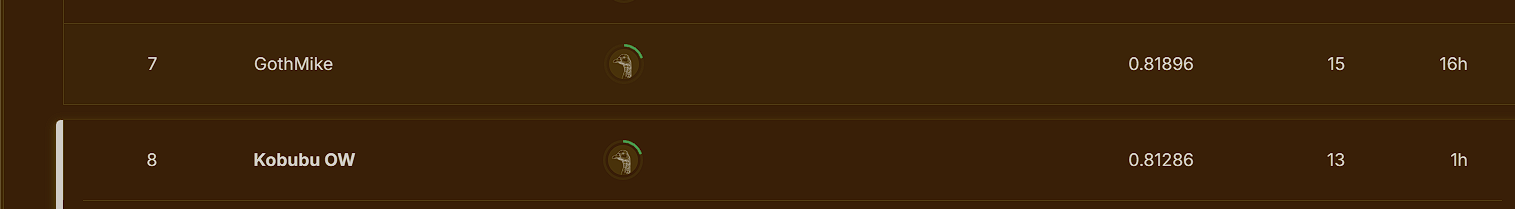

Так, долготы и широты в принципе достаточно для 81% точности. Наверное, если бы в тестовом датасете были все данные по долготе и широте, а также разметка северной/южной широты или восточной/западной долготы, то процент был бы выше.
Сейчас у лидера 88% точности. Попробую разобраться с другими признаками и что-то придумать.

Пропущенные значения в каждом столбце:
Field name                         0
Reservoir unit                     0
Country                           27
Region                            38
Basin name                        38
Tectonic regime                    0
Latitude                          27
Longitude                         30
Operator company                   0
Onshore/Offshore                   0
Hydrocarbon type                   0
Reservoir status                   0
Structural setting                 0
Depth                              0
Reservoir period                   0
Lithology                          0
Thickness (gross average ft)       0
Thickness (net pay average ft)     0
Porosity                           0
Permeability                       0
dtype: int64

Описательная статистика числовых данных:
        Latitude   Longitude         Depth  Thickness (gross average ft)  \
count  282.00000  279.000000    309.000000                    309.000000   
mean    35.624

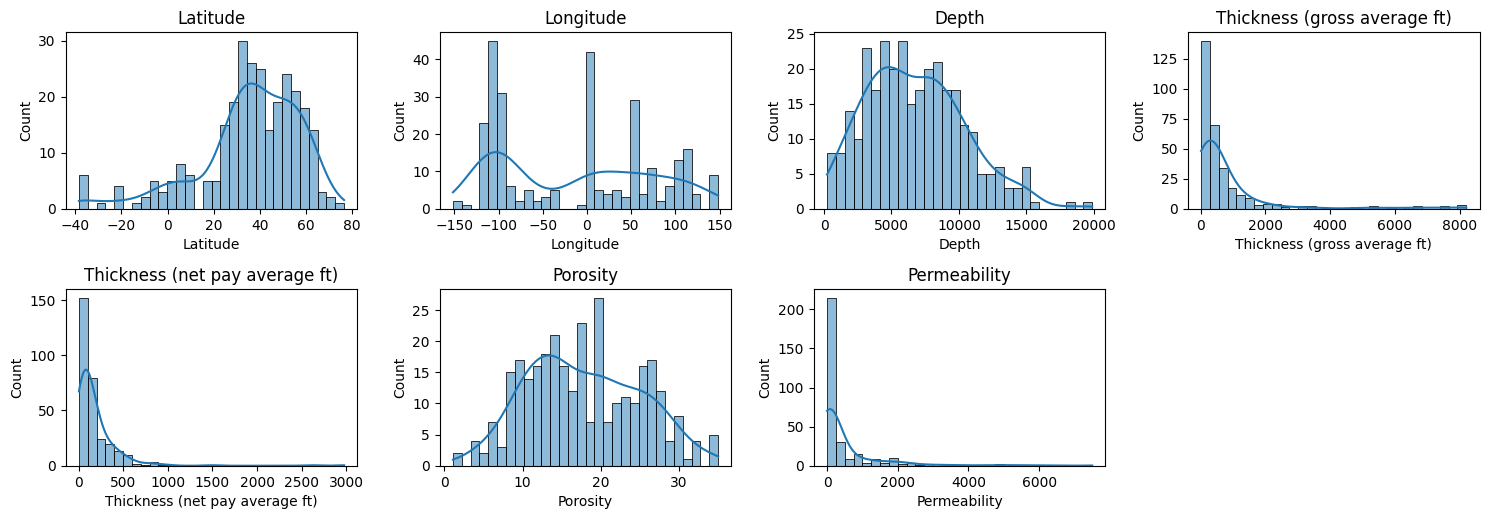


Уникальные значения в Field name: ['ZHIRNOV' 'LAGOA PARDA' 'ABQAIQ' 'MURCHISON' 'WEST PEMBINA' 'UCHKYR'
 'WESTHOPE SOUTH' 'MCALLEN RANCH' 'ELLIS RANCH' 'STRACHAN' 'MENE GRANDE'
 'BADR EL DIN-2' 'BRIDGER LAKE' 'JUDY CREEK' 'ANGUS' 'SCOTT' 'HEERA'
 'HUGOTON-PANHANDLE' 'CUSIANA' 'CLYDE' 'BONGKOT' 'GIDGEALPA' 'ALIBEKMOLA'
 'VENTURE' 'BILLINGS NOSE' 'DONGFANG 1-1' 'KEMNITZ' 'VACUUM' 'ZAKUM'
 'PEMBINA' 'RAMAN' 'YAERXIA' 'ROMASHKINO' 'GASIKULE' 'VILLEPERDUE' 'UZEN'
 'CANDEIAS' 'ULA' 'NIPISI' 'MINAS' 'NORTH WARD-ESTES' 'PENWELL' 'TAGLU'
 'LLOYDMINSTER AREA' 'PORT ACRES' 'ELK BASIN' 'JAY' 'BRAGE' 'WEMBLEY'
 'YIBAL' 'PALM VALLEY' 'DEFA' 'ANETH' 'NUMBI' 'ERSKINE' 'WUBAITI'
 'PATRICK DRAW' 'MURAVLENKOV' 'SIRIKIT' 'WEST CHEYENNE' 'XIAOJI'
 'POKACHEV' 'PAMPO' 'JINGBIAN' 'WYTCH FARM' 'BRANTON' 'INDEFATIGABLE'
 'MIDGARD' 'ELK-POCA' 'RINCON' 'LANWA' 'JOFFRE' 'MCARTHUR RIVER'
 'HIBERNIA' 'KULESHOV' 'SHATLYK' 'SLAUGHTER' 'OROCUAL' 'GLENBURN'
 'CARTHAGE' 'WEST TEBUK' 'SUNRISE-TROUBADOUR' 'NORTH ANDERSON 

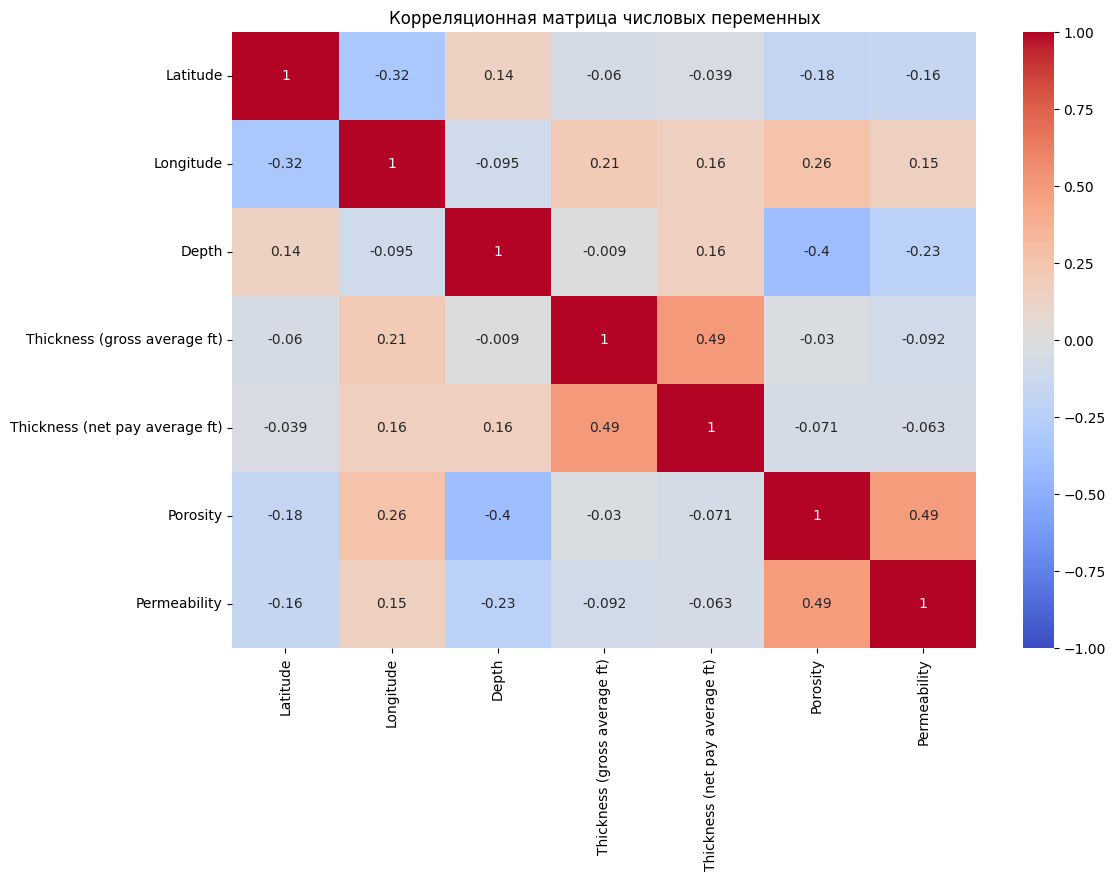

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:")
print(missing_values)

# 2. Анализ распределения числовых данных
print("\nОписательная статистика числовых данных:")
print(df.describe())

# 3. Визуализация распределения числовых столбцов
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    # Удаляем пропущенные значения и проверяем на выбросы
    data = df[column].dropna()
    # Игнорируем бесконечности и очень большие значения
    data = data[np.isfinite(data)]
    # Строим гистограмму
    sns.histplot(data, kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.show()

# 4. Анализ категориальных данных
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"\nУникальные значения в {column}: {df[column].unique()}")
    print(f"Частота значений в {column}:")
    print(df[column].value_counts())

# 5. Визуализация корреляции между числовыми переменными
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица числовых переменных')
plt.show()

# 6. Анализ целевой переменной (если 'class' является целевой)
if 'class' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='class')
    plt.title('Распределение классов')
    plt.show()

А давайте еще нечисловые признаки проверим

Корреляция признаков с целевой переменной 'Onshore/Offshore':
Latitude: nan
Longitude: nan
Field name: 1.0000
Basin name: 0.9292
Reservoir unit: 0.9215
Operator company: 0.6950
Structural setting: 0.6181
Tectonic regime: 0.6046
Country: 0.6027
Region: 0.4514
Reservoir period: 0.3799
Thickness (net pay average ft): -0.3130
Reservoir status: 0.2834
Porosity: -0.2627
Lithology: 0.2609
Depth: -0.2103
Permeability: -0.2049
Hydrocarbon type: 0.1003
Thickness (gross average ft): -0.0647


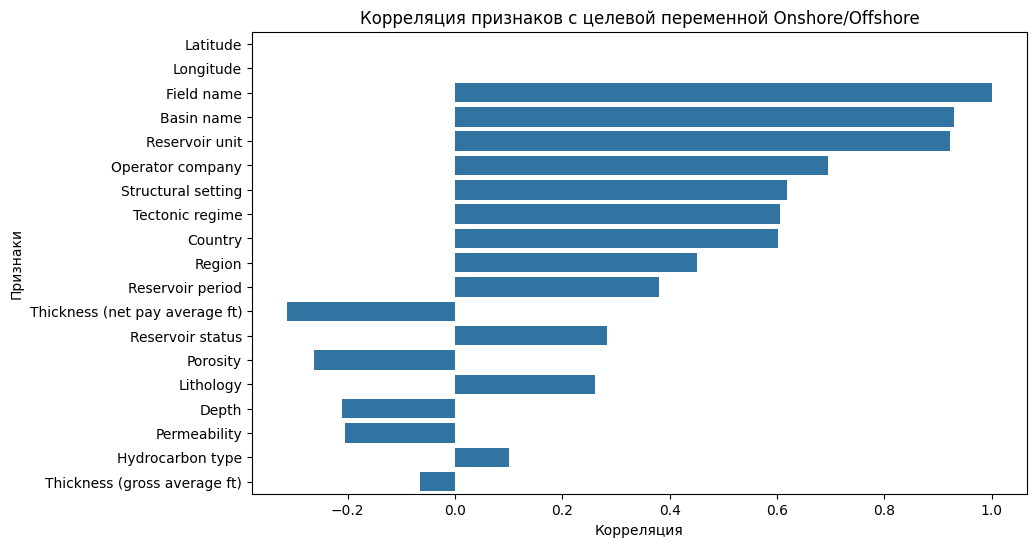

In [93]:
from scipy.stats import pointbiserialr, spearmanr, kendalltau
from scipy.stats import chi2_contingency

# 1. Для числовых переменных
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_results = {}

for col in numerical_columns:
    if col != 'Onshore/Offshore':
        # Используем корреляцию Спирмена для числовых переменных
        corr, _ = spearmanr(df[col], df['Onshore/Offshore'])
        correlation_results[col] = corr

# 2. Для категориальных переменных
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'Onshore/Offshore':
        # Создаем таблицу сопряженности
        contingency_table = pd.crosstab(df[col], df['Onshore/Offshore'])
        # Вычисляем коэффициент корреляции Крамера
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
        correlation_results[col] = cramers_v

# Сортируем результаты по абсолютному значению корреляции
sorted_correlation_results = {k: v for k, v in sorted(correlation_results.items(), key=lambda item: abs(item[1]), reverse=True)}

# Выводим результаты
print("Корреляция признаков с целевой переменной 'Onshore/Offshore':")
for feature, corr in sorted_correlation_results.items():
    print(f"{feature}: {corr:.4f}")

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_correlation_results.values()), y=list(sorted_correlation_results.keys()), orient='h')
plt.title('Корреляция признаков с целевой переменной Onshore/Offshore')
plt.xlabel('Корреляция')
plt.ylabel('Признаки')
plt.show()

Добавим в модель признаки, имеющие высокую корелляцию с целевой переменной
Basin name: 0.9292
Reservoir unit: 0.9215
Operator company: 0.6950

In [94]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")

# Признаки и целевая переменная
X_lgmb = df[['Latitude', 'Longitude', 'Basin name', 'Reservoir unit', 'Operator company']]
y_lgbm = df['Onshore/Offshore']

# Преобразование категориальных признаков в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_lgbm)

# Кодирование категориальных признаков
for col in ['Basin name', 'Reservoir unit', 'Operator company']:
    X_lgmb[col] = LabelEncoder().fit_transform(X_lgmb[col])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_lgmb, y_encoded, test_size=0.3, random_state=42)

# Создание датасетов для LightGBM
train_data = lgb.Dataset(X_train, label=y_train, free_raw_data=False)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data, free_raw_data=False)

# Параметры модели (взяты из C# версии)
params = {
    'objective': 'multiclass',  # Многоклассовая классификация
    'num_class': len(label_encoder.classes_),  # Количество классов
    'num_leaves': 4,  # Количество листьев
    'min_data_in_leaf': 21,  # Минимальное количество примеров в листе
    'num_boost_round': 101,  # Количество деревьев (итераций)
    'max_bin': 271,  # Максимальное количество бинов для каждой фичи
    'feature_fraction': 0.99999999,  # Доля фич, используемых для построения каждого дерева
    'bagging_fraction': 0.6285589340683145,  # Доля примеров, используемых для обучения каждого дерева
    'learning_rate': 0.6093183173214886,  # Скорость обучения
    'lambda_l1': 2E-10,  # L1-регуляризация
    'lambda_l2': 0.852028280367047,  # L2-регуляризация
    'verbose': -1  # Отключение вывода логов
}

# Обучение модели
model = lgb.train(
    params,
    train_data,
    num_boost_round=101,  # Количество деревьев
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]  # Ранняя остановка
)

# Предсказание на тестовых данных
y_pred = model.predict(X_test, num_iteration=model.best_iteration)  # Используем X_test
y_pred_labels = y_pred.argmax(axis=1)  # Преобразование вероятностей в метки классов

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[10]	valid_0's multi_logloss: 0.313354
Accuracy: 0.9354838709677419

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       1.00      0.79      0.88        24
         ONSHORE       0.92      1.00      0.96        68
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.94        93
       macro avg       0.64      0.60      0.61        93
    weighted avg       0.93      0.94      0.93        93



<ipython-input-94-50c7697adbad>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lgmb[col] = LabelEncoder().fit_transform(X_lgmb[col])
<ipython-input-94-50c7697adbad>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_lgmb[col] = LabelEncoder().fit_transform(X_lgmb[col])
<ipython-input-94-50c7697adbad>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Тестируем модель

In [95]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime

# 1. Функция подготовки данных
def prepare_data(df, encoders=None, most_common=None, is_train=True):
    df = df.copy()
    features = ['Latitude', 'Longitude', 'Basin name', 'Reservoir unit']
    categorical_cols = ['Basin name', 'Reservoir unit']

    if is_train:
        # Сохраняем самые частые категории
        most_common = {col: df[col].mode()[0] for col in categorical_cols}

        # Создаем кодировщики
        encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le

        return df[features], encoders, most_common
    else:
        # Применяем кодировщики к тестовым данным
        for col in categorical_cols:
            # Заменяем неизвестные категории на самые частые из тренировочных данных
            df[col] = df[col].apply(lambda x: x if x in encoders[col].classes_ else most_common[col])
            df[col] = encoders[col].transform(df[col])
        return df[features]

# 2. Загрузка и подготовка данных
train_df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")
X_train, encoders, most_common = prepare_data(train_df, is_train=True)

# Кодирование целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_df['Onshore/Offshore'])

# 3. Разделение данных на обучающую и валидационную выборки
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_encoded,
    test_size=0.3,
    random_state=42
)

# 4. Обучение модели
params = {
    'objective': 'multiclass',
    'num_class': len(label_encoder.classes_),
    'num_leaves': 4,
    'min_data_in_leaf': 21,
    'max_bin': 271,
    'feature_fraction': 0.99999999,
    'bagging_fraction': 0.6285589340683145,
    'learning_rate': 0.05,  # Уменьшенная скорость обучения
    'lambda_l1': 2E-10,
    'lambda_l2': 0.852028280367047,
    'verbose': -1,
    'is_unbalance': True  # Учет дисбаланса классов
}

model = lgb.train(
    params,
    lgb.Dataset(X_tr, label=y_tr),
    num_boost_round=500,  # Увеличенное количество деревьев
    valid_sets=[lgb.Dataset(X_val, label=y_val)],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# 5. Оценка модели на валидационной выборке
y_pred = model.predict(X_val)
y_pred_labels = y_pred.argmax(axis=1)  # Используем числовые метки для оценки

# Вывод точности и отчета классификации
print("Accuracy на валидационной выборке:", accuracy_score(y_val, y_pred_labels))
print("\nClassification Report на валидационной выборке:")
print(classification_report(y_val, y_pred_labels, target_names=label_encoder.classes_))

# 6. Предсказание на тестовых данных
test_df = pd.read_csv("/content/oil_test_fixed.csv")
X_test = prepare_data(test_df, encoders=encoders, most_common=most_common, is_train=False)

# Прогнозирование
y_pred_test = model.predict(X_test)
y_pred_test_labels = label_encoder.inverse_transform(y_pred_test.argmax(axis=1))  # Обратно в строки

# 7. Сохранение результатов
results = pd.DataFrame({
    'index': test_df.index,
    'Onshore/Offshore': y_pred_test_labels
}).replace({'ONSHORE': 1, 'OFFSHORE': 0})

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
name = f"oil_predictions_{timestamp}.csv"
results.to_csv(name, index=False)

print(f"\nУспешно! Результаты сохранены в {name}.csv")
print(results.head())

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[131]	valid_0's multi_logloss: 0.3162
Accuracy на валидационной выборке: 0.9247311827956989

Classification Report на валидационной выборке:
                  precision    recall  f1-score   support

        OFFSHORE       1.00      0.75      0.86        24
         ONSHORE       0.91      1.00      0.95        68
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.92        93
       macro avg       0.64      0.58      0.60        93
    weighted avg       0.92      0.92      0.92        93


Успешно! Результаты сохранены в oil_predictions_20250310_193703.csv.csv
   index  Onshore/Offshore
0      0                 1
1      1                 0
2      2                 1
3      3                 0
4      4                 1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-95-4a7cdb612401>:95: FutureWarning

Что-то есть, используем модель

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Загрузка данных
df = pd.read_csv("/content/classification-of-oil-and-gas-fields/train_oil.csv")

# Признаки и целевая переменная
X = df[['Latitude', 'Longitude']]
y = df['Onshore/Offshore']

# Преобразование целевой переменной в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')  # Заменяем NaN на среднее значение
X = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Создание модели OneVsRest с GradientBoostingClassifier
model = OneVsRestClassifier(
    GradientBoostingClassifier(
        n_estimators=5,  # Количество деревьев (аналог NumberOfTrees)
        max_leaf_nodes=8,  # Максимальное количество листьев (аналог NumberOfLeaves)
        min_samples_leaf=13,  # Минимальное количество примеров в листе (аналог MinimumExampleCountPerLeaf)
        learning_rate=0.9567078935431538,  # Скорость обучения (аналог LearningRate)
        max_features=0.99999999,  # Доля фич (аналог FeatureFraction)
        random_state=42
    )
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.9139784946236559

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       0.91      0.83      0.87        24
         ONSHORE       0.93      0.96      0.94        68
ONSHORE-OFFSHORE       0.00      0.00      0.00         1

        accuracy                           0.91        93
       macro avg       0.61      0.60      0.60        93
    weighted avg       0.91      0.91      0.91        93



так, тут весело, а давайте попробуем теперь потренить на аугментед дата

In [97]:
# Загрузка данных
df = pd.read_csv("/content/augmented_data.csv")

# Признаки и целевая переменная
X = df[['Latitude', 'Longitude']]
y = df['Onshore/Offshore']

# Преобразование целевой переменной в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')  # Заменяем NaN на среднее значение
X = imputer.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Создание модели OneVsRest с GradientBoostingClassifier
model = OneVsRestClassifier(
    GradientBoostingClassifier(
        n_estimators=5,  # Количество деревьев (аналог NumberOfTrees)
        max_leaf_nodes=8,  # Максимальное количество листьев (аналог NumberOfLeaves)
        min_samples_leaf=13,  # Минимальное количество примеров в листе (аналог MinimumExampleCountPerLeaf)
        learning_rate=0.9567078935431538,  # Скорость обучения (аналог LearningRate)
        max_features=0.99999999,  # Доля фич (аналог FeatureFraction)
        random_state=42
    )
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.925

Classification Report:
                  precision    recall  f1-score   support

        OFFSHORE       0.85      0.97      0.91        35
         ONSHORE       1.00      0.82      0.90        45
ONSHORE-OFFSHORE       0.93      1.00      0.96        40

        accuracy                           0.93       120
       macro avg       0.93      0.93      0.92       120
    weighted avg       0.93      0.93      0.92       120



Еще лучше, теперь попробуем это внедрить

In [98]:
# Признаки и целевая переменная
X = df[['Latitude', 'Longitude']]
y = df['Onshore/Offshore']

# Преобразование целевой переменной в числовой формат
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Создание модели OneVsRest с GradientBoostingClassifier
model = OneVsRestClassifier(
    GradientBoostingClassifier(
        n_estimators=5,  # Количество деревьев (аналог NumberOfTrees)
        max_leaf_nodes=8,  # Максимальное количество листьев (аналог NumberOfLeaves)
        min_samples_leaf=13,  # Минимальное количество примеров в листе (аналог MinimumExampleCountPerLeaf)
        learning_rate=0.9567078935431538,  # Скорость обучения (аналог LearningRate)
        max_features=0.99999999,  # Доля фич (аналог FeatureFraction)
        random_state=42
    )
)

# Обучение модели
model.fit(X, y_encoded)

OneVsRestClassifier(estimator=GradientBoostingClassifier(learning_rate=0.9567078935431538,
                                                         max_features=0.99999999,
                                                         max_leaf_nodes=8,
                                                         min_samples_leaf=13,
                                                         n_estimators=5,
                                                         random_state=42))

In [99]:
now = datetime.now()

name = f"oil_test_predictions_{now}.csv"

test_df = pd.read_csv("/content/oil_test_fixed.csv")
X_test = df[['Latitude', 'Longitude']]

y_pred_test = model.predict(X_test)

results = pd.DataFrame({
    'index': test_df.index,
    'Onshore/Offshore': y_pred_test_labels
}).replace({'ONSHORE': 1, 'OFFSHORE': 0})

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
name = f"oil_predictions_{timestamp}.csv"
results.to_csv(name, index=False)

print(f"\nУспешно! Результаты сохранены в {name}.csv")
print(results.head())


Успешно! Результаты сохранены в oil_predictions_20250310_193703.csv.csv
   index  Onshore/Offshore
0      0                 1
1      1                 0
2      2                 1
3      3                 0
4      4                 1


<ipython-input-99-aa4401836ad4>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).replace({'ONSHORE': 1, 'OFFSHORE': 0})


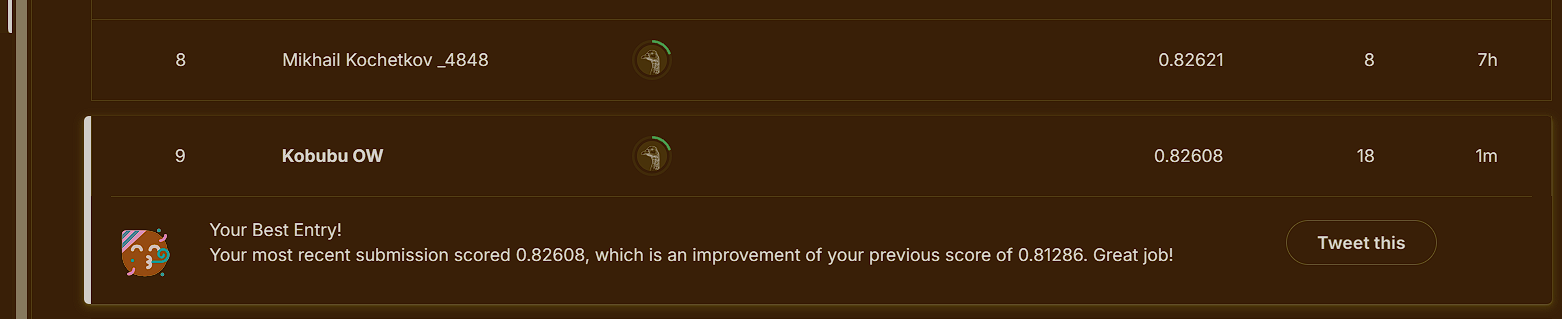

У новой модели показатель выше.


82%, конечно, не очень много, но что-то мне подсказывает, что с кривым тестовым датасетом с синтетическими и пропущенными значениями сильно многого добиваться смысла нет.

Напомню, что в трейне у целевого признака 3 возможных класса, при этом в тестовом датасете этих классов всего 2.
Кроме того, в тестовом датасете много пропусков, а сами данные синтетические.

